# Digit Recognition with CNN

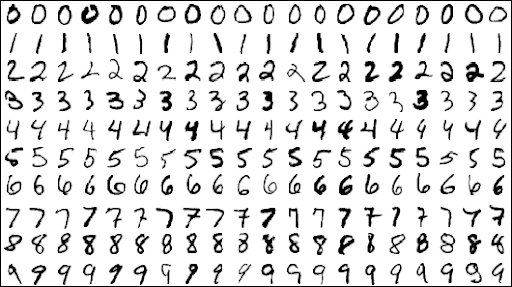

1. [Convolutional Neural Network](#1)
2. [Libraries and Utilities](#2)
3. [Loading Data](#3)
4. [Visualization](#4)
5. [Preprocessing](#17)
    - [Normalization](#5)
    - [Reshaping](#6)
    - [Label Encoding](#7)
8. [Train Test Split](#8)
9. [Implementing with Keras](#9)
10. [Define Optimizer](#10)
11. [Compile Model](#11)
12. [Epochs and Batch Size](#12)
13. [Data Augmentation](#13)
14. [Fit the Model](#14)
15. [Evaluate the Model](#15)
16. [Confusion Matrix](#16)

<a id = "1"></a>
# Convolutional Neural Network

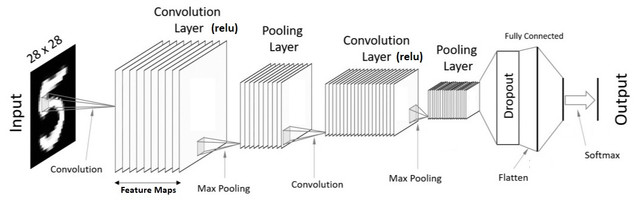

Convolutional Neural Network (CNN) or space invariant artificial neural networks (SIANN) is a class of deep neural networks that commonly used in visual analysis. They are based on shared-weight architecture of the convolution kernels that scan the hidden layers and translation invariance characteristics.Image and video recognition, recommender systems, image classification, Image segmentation, medical image analysis, natural language processing, brain-computer interfaces, and financial time series are the most frequently used fields of study.

<a id = "2"></a>
# Libraries and Utilities

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id = "3"></a>
# Loading Data

In [ ]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train.shape)
train.head()

In [ ]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test.shape)
test.head()

In [ ]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"],axis = 1)
Y_train.head()

<a id = "4"></a>
# Visualization

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette = 'Set3')
plt.title("Number of Digit Classes", size = 18)
plt.xticks(size = 16)
plt.xlabel("Digits", size = 12)
plt.ylabel("Count", size =12)
Y_train.value_counts()

In [ ]:
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = X_train.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(str(Y_train[i]), y=-0.18,color="red")
plt.show()

<a id = "17"></a>
# Preprocessing

<a id = "5"></a>
## Normalization
We perform a grayscale normalization to reduce the effect of illuminations differences.

In [ ]:
X_train = X_train / 255.0
test = test / 255.0
print("X_train Shape: ",X_train.shape)
print("Test Shape: ",test.shape)

<a id = "6"></a>
## Reshaping

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train Shape: ",X_train.shape)
print("Test Shape: ",test.shape)

<a id = "7"></a>
## Label Encoding

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 10)

<a id = "8"></a>
# Train Test Split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,
                                                  Y_train,
                                                  test_size = 0.3,
                                                  random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

In [ ]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.axis("off")
plt.show()

<a id = "9"></a>
# Implementing with Keras

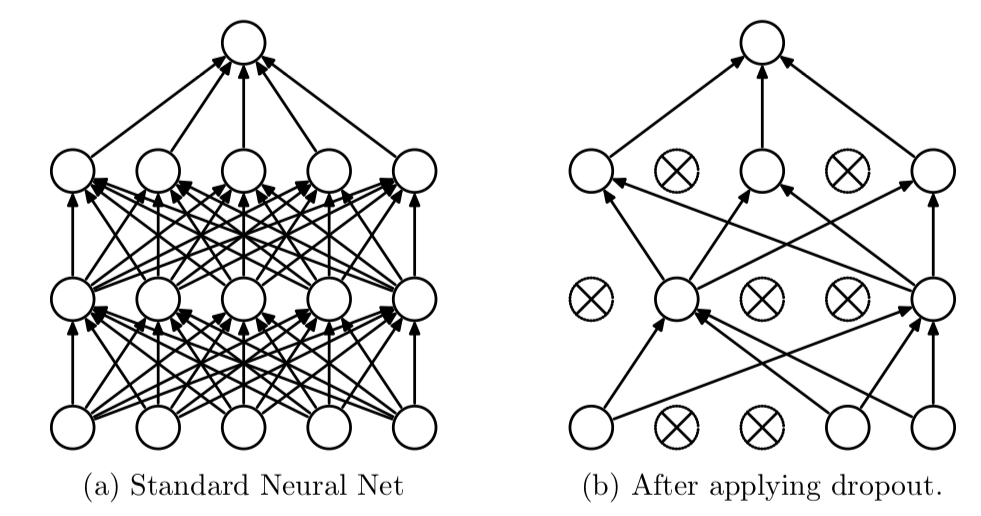

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 8,
                 kernel_size = (5,5),
                 padding = 'Same',
                 activation ='relu',
                 input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

<a id = "10"></a>
# Define Optimizer
We can change the learning rate with Adam Optimizer.

In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

<a id = "11"></a>
# Compile Model

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id = "12"></a>
# Epochs and Batch Size
Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

In [ ]:
epochs = 20
batch_size = 250

<a id = "13"></a>
# Data Augmentation
We need to expand artificially our handwritten digit datase to avoid overfitting problem. Alter the training data with small transformations to reproduce the variations of digit.

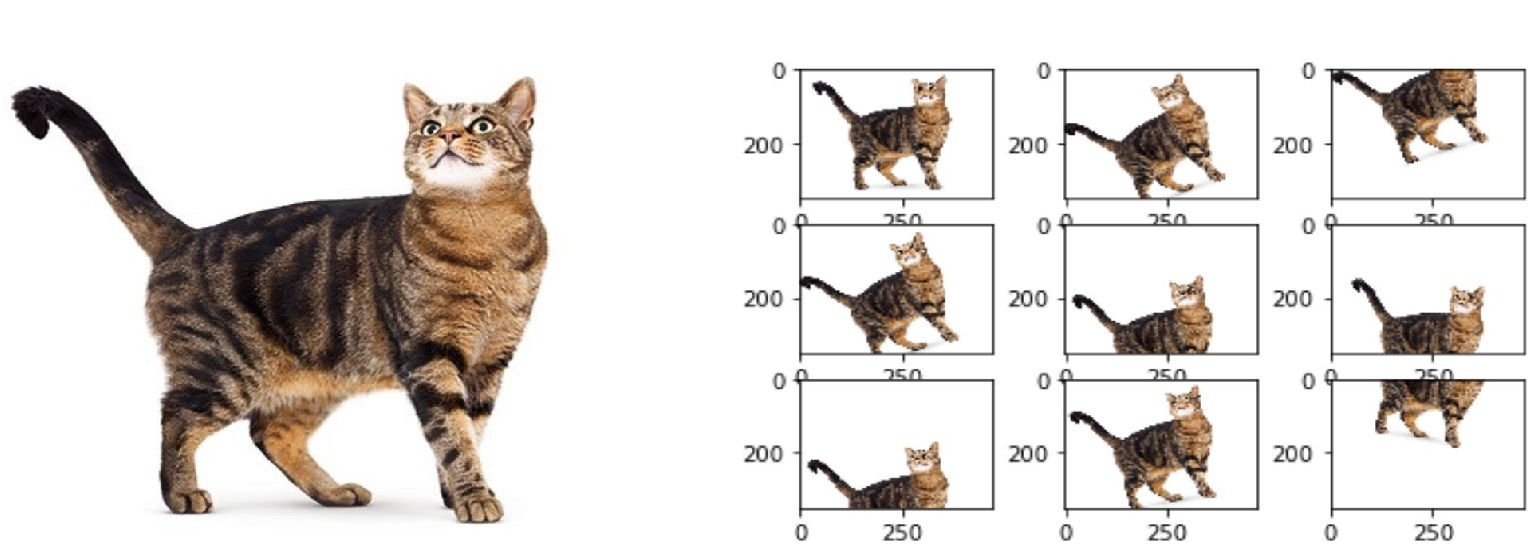

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=5,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)
datagen.fit(X_train)

<a id = "14"></a>
# Fit the Model

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

<a id = "15"></a>
# Evaluate the Model

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
ax1.plot(history.history['loss'], color='r', label="Loss")
ax1.set_title("Test Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")

ax2.plot(history.history['accuracy'], color='b', label="Accuracy")
ax2.set_title("Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
fig.tight_layout()

In [ ]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = X_val[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i], Y_true[i]),
              y=-0.35,color="blue")
f.tight_layout()
    
f.show()


In [ ]:
wrong_index = []
for i in range(2400):
    if Y_pred_classes[i] != Y_true[i]:
        wrong_index.append(i)
print(len(wrong_index))

In [ ]:
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Some of Mislabeled Digits", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = X_val[wrong_index[i]]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[wrong_index[i]],
                                                      Y_true[wrong_index[i]]),y=-0.35,color="red")
f.tight_layout()
    
f.show()

<a id = "16"></a>
# Confusion Matrix

In [ ]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx,
            annot=True,
            linewidths=3,
            cmap="gist_gray",
            fmt= '.0f',
            ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label", size = 13)
plt.ylabel("True Label", size = 13)
plt.title("Confusion Matrix", size = 16)
plt.show()